vyrobce,id,propustnost_puvodni,propustnost_nova,montaz,zlepseni,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>,<lgl>
A,16,304.69,350.00,amater,45.31,TRUE,TRUE
B,166,288.09,307.19,profesional,19.10,TRUE,FALSE
B,169,289.03,307.73,profesional,18.70,TRUE,FALSE
B,180,284.34,303.33,profesional,18.99,TRUE,FALSE


vyrobce,mean,median,min,max,sd,norm_test,sym_test
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,4.022323,4.020,-8.17,15.68,5.188408,0.7473916,0.9953094
B,6.500928,7.050,-4.18,17.64,4.523561,0.6165428,0.1088082
C,5.871260,5.395,-6.40,19.00,5.424914,0.5583202,0.2432175
D,4.621900,4.625,-5.70,15.90,4.410722,0.9229796,0.9926549


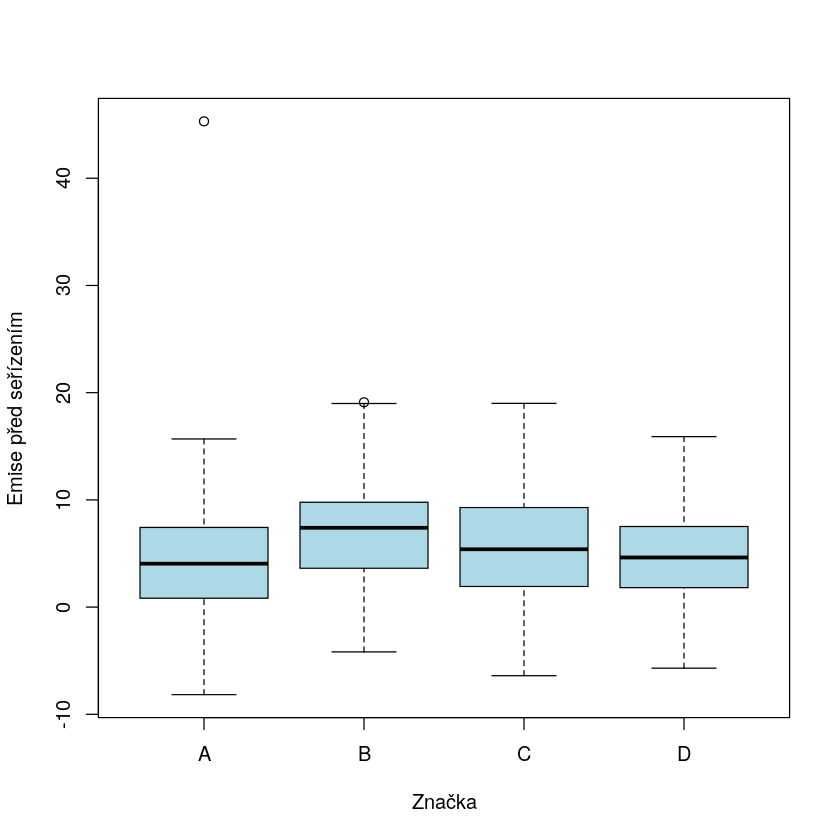

In [24]:
library(readxl)
library(dplyr)
library(ggplot2)
library(rstatix)
library(tidyr)

# Load the data
data <- read_excel("zk4B.xlsx")


# Zobrazení prvních několika řádků data frame
data$zlepseni <- (data$propustnost_nova - data$propustnost_puvodni)

boxplot(data$zlepseni ~ data$vyrobce, xlab = "Značka", ylab = "Emise před seřízením", col = "lightblue")

outliers <- data %>%
    group_by(vyrobce) %>%
    rstatix::identify_outliers(zlepseni)

outliers

data$zlepseni <- ifelse(data$id %in% outliers$id, NA, data$zlepseni)
data <- na.omit(data)
summry <- data %>%
    group_by(vyrobce) %>%
    summarise(
        mean = mean(zlepseni),
        median = median(zlepseni),
        min = min(zlepseni),
        max = max(zlepseni),
        sd = sd(zlepseni),
        norm_test = shapiro.test(zlepseni)$p.value,
        sym_test = lawstat::symmetry.test(zlepseni, boot = FALSE)$p.value
    )
summry


# 4

In [25]:
A <- data$zlepseni[data$vyrobce == "A"]


### b,c)

In [26]:
t.test(A, alternative = "greater")



	One Sample t-test

data:  A
t = 7.7137, df = 98, p-value = 5.152e-12
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 3.156421      Inf
sample estimates:
mean of x 
 4.022323 


### d)

In [27]:
A_fail <- data$zlepseni[data$vyrobce == "A"] < 0
tab <- table(A_fail)
n <- sum(tab)
x <- tab[2]

binom.test(x, n)



	Exact binomial test

data:  x and n
number of successes = 19, number of trials = 99, p-value = 4.394e-10
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.1196844 0.2833676
sample estimates:
probability of success 
             0.1919192 


In [28]:
p <- x / n
p
9/(p * (1 - p))

TRUE 
0.1919192

TRUE 
58.03224

# 5

In [29]:
A_fail <- data$zlepseni[data$vyrobce == "A"] < 0
A_hnojivo <- data$montaz[data$vyrobce == "A"]
tab <- table(A_hnojivo, A_fail)
tab <- tab[c(1, 2), c(2, 1)]
tab

             A_fail
A_hnojivo     TRUE FALSE
  amater        16    55
  profesional    3    25

### b)

[1] 0.1067122

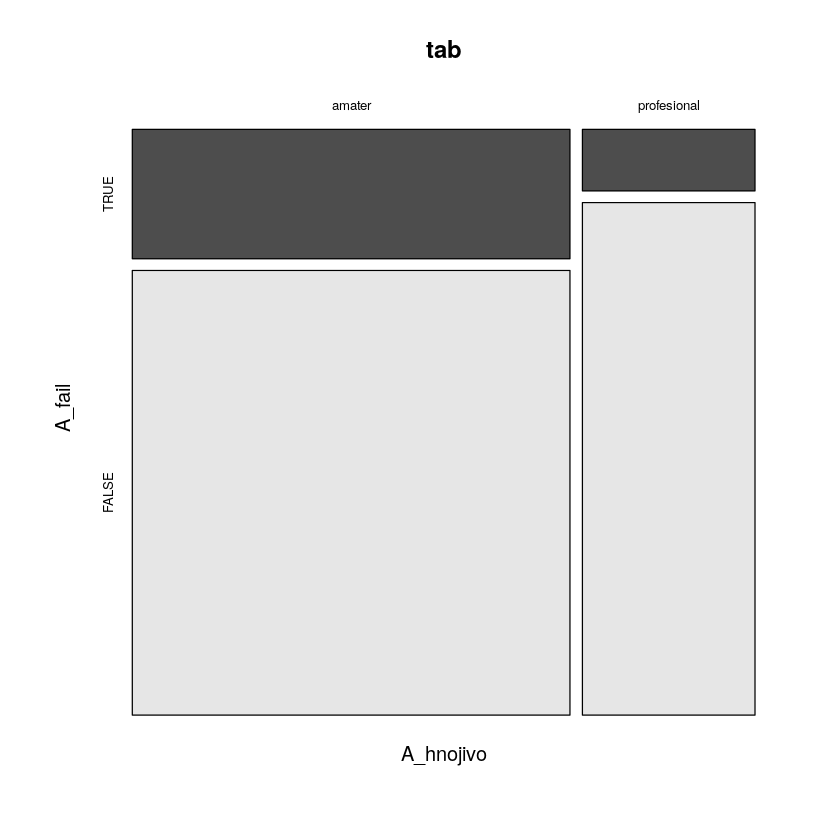

In [30]:
cramer_v(tab)
mosaicplot(tab, color = TRUE)


### c)

In [31]:
epiR::epi.2by2(tab)


             Outcome +    Outcome -      Total                 Inc risk *
Exposed +           16           55         71     22.54 (13.46 to 34.00)
Exposed -            3           25         28      10.71 (2.27 to 28.23)
Total               19           80         99     19.19 (11.97 to 28.34)

Point estimates and 95% CIs:
-------------------------------------------------------------------
Inc risk ratio                                 2.10 (0.66, 6.66)
Inc odds ratio                                 2.42 (0.65, 9.08)
Attrib risk in the exposed *                   11.82 (-3.20, 26.84)
Attrib fraction in the exposed (%)            52.46 (-50.60, 84.99)
Attrib risk in the population *                8.48 (-5.36, 22.31)
Attrib fraction in the population (%)         44.17 (-47.63, 78.89)
-------------------------------------------------------------------
Uncorrected chi2 test that OR = 1: chi2(1) = 1.809 Pr>chi2 = 0.179
Fisher exact test that OR = 1: Pr>chi2 = 0.259
 Wald confidence limits